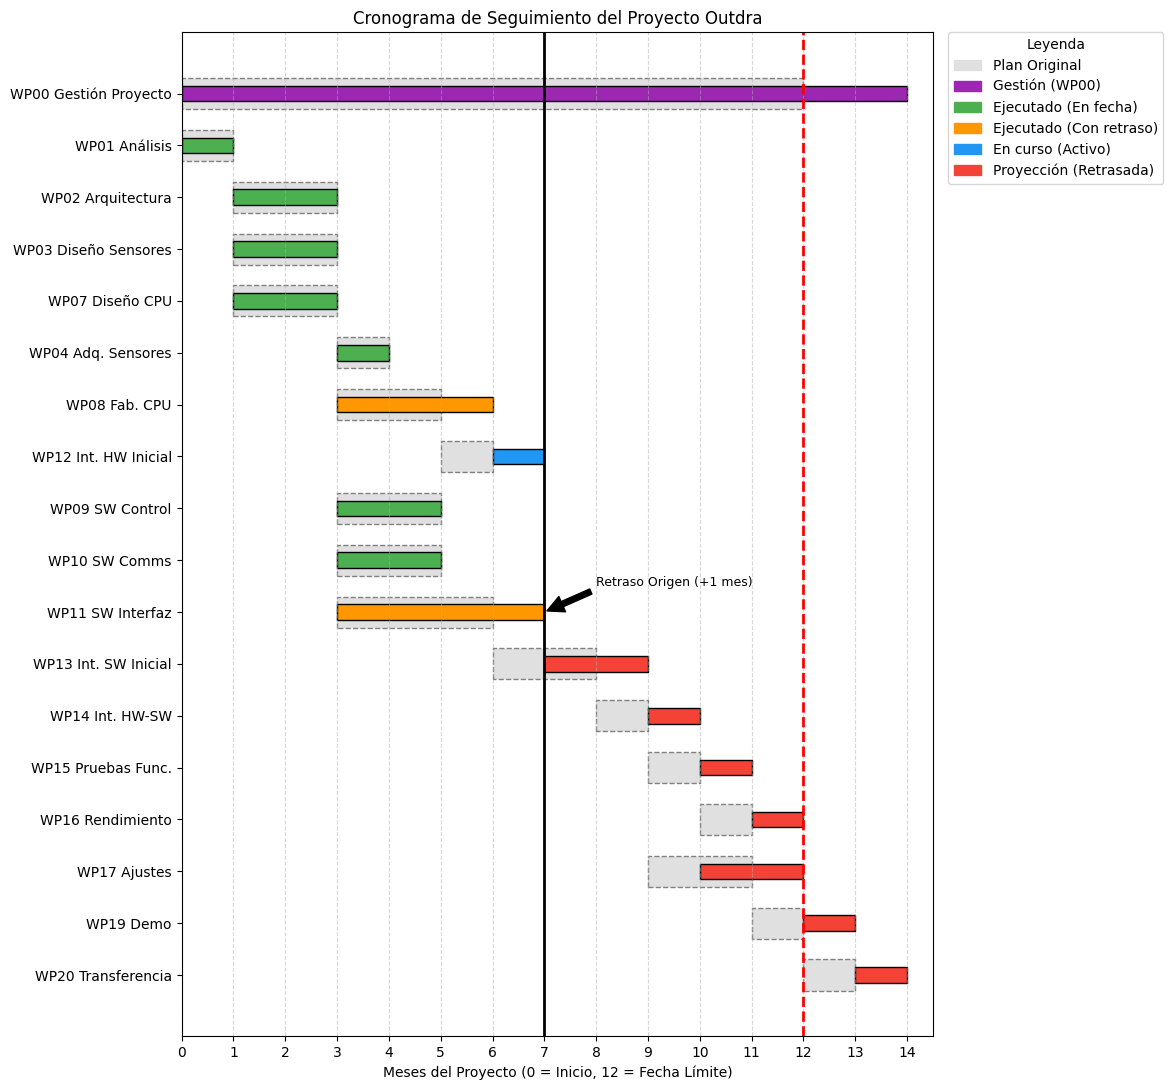

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

tasks_comparison = [
    # Gestión
    ("WP00 Gestión Proyecto", 0, 12, 0, 14, "Management"),
    # Analistas
    ("WP01 Análisis", 0, 1, 0, 1, "OK"),
    ("WP02 Arquitectura", 1, 2, 1, 2, "OK"),
    # Hardware
    ("WP03 Diseño Sensores", 1, 2, 1, 2, "OK"),
    ("WP07 Diseño CPU", 1, 2, 1, 2, "OK"),
    ("WP04 Adq. Sensores", 3, 1, 3, 1, "OK"),
    ("WP08 Fab. CPU", 3, 2, 3, 3, "Late"),
    ("WP12 Int. HW Inicial", 5, 1, 6, 1, "Active"),
    # Software
    ("WP09 SW Control", 3, 2, 3, 2, "OK"),
    ("WP10 SW Comms", 3, 2, 3, 2, "OK"),
    ("WP11 SW Interfaz", 3, 3, 3, 4, "Late"),
    # Integration & Critical Path
    ("WP13 Int. SW Inicial", 6, 2, 7, 2, "Critical"),
    ("WP14 Int. HW-SW", 8, 1, 9, 1, "Critical"),
    ("WP15 Pruebas Func.", 9, 1, 10, 1, "Critical"),
    ("WP16 Rendimiento", 10, 1, 11, 1, "Critical"),
    ("WP17 Ajustes", 9, 2, 10, 2, "Critical"),
    ("WP19 Demo", 11, 1, 12, 1, "Critical"),
    ("WP20 Transferencia", 12, 1, 13, 1, "Critical")
]

fig, ax = plt.subplots(figsize=(14, 11))

# Plotting
yticks = []
yticklabels = []

for i, (task, plan_start, plan_dur, act_start, act_dur, status) in enumerate(reversed(tasks_comparison)):
    # 1. Plot Baseline (Grey)
    ax.broken_barh([(plan_start, plan_dur)], (i - 0.3, 0.6), facecolors='#e0e0e0', edgecolor='grey', linestyle='--')

    # 2. Plot Actual (Color)
    if status == "OK":
        color = '#4CAF50' # Green
    elif status == "Late":
        color = '#FF9800' # Orange
    elif status == "Critical":
        color = '#F44336' # Red
    elif status == "Management":
        color = '#9C27B0' # Purple
    elif status == "Active":
        color = '#2196F3' # Blue
    else:
        color = '#2196F3' # Default Blue

    ax.broken_barh([(act_start, act_dur)], (i - 0.15, 0.3), facecolors=color, edgecolor='black')

    yticks.append(i)
    yticklabels.append(task)

# Formatting
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_xlabel("Meses del Proyecto (0 = Inicio, 12 = Fecha Límite)")
ax.set_xlim(0, 14.5)
ax.set_xticks(range(0, 15))
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Lines
ax.axvline(x=7, color='black', linewidth=2, label='HOY (Fin Mes 7)')
ax.axvline(x=12, color='red', linestyle='--', linewidth=2, label='DEADLINE (Fin Mes 12)')

# Annotations
ax.annotate('Retraso Origen (+1 mes)', xy=(7, 7), xytext=(8, 7.5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=9)

# Legend
patches = [
    mpatches.Patch(color='#e0e0e0', label='Plan Original'),
    mpatches.Patch(color='#9C27B0', label='Gestión (WP00)'),
    mpatches.Patch(color='#4CAF50', label='Ejecutado (En fecha)'),
    mpatches.Patch(color='#FF9800', label='Ejecutado (Con retraso)'),
    mpatches.Patch(color='#2196F3', label='En curso (Activo)'), # Added Blue Entry
    mpatches.Patch(color='#F44336', label='Proyección (Retrasada)'),
]
ax.legend(handles=patches, title="Leyenda", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

ax.set_title("Cronograma de Seguimiento del Proyecto Outdra")

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('diagrama_gantt.png')

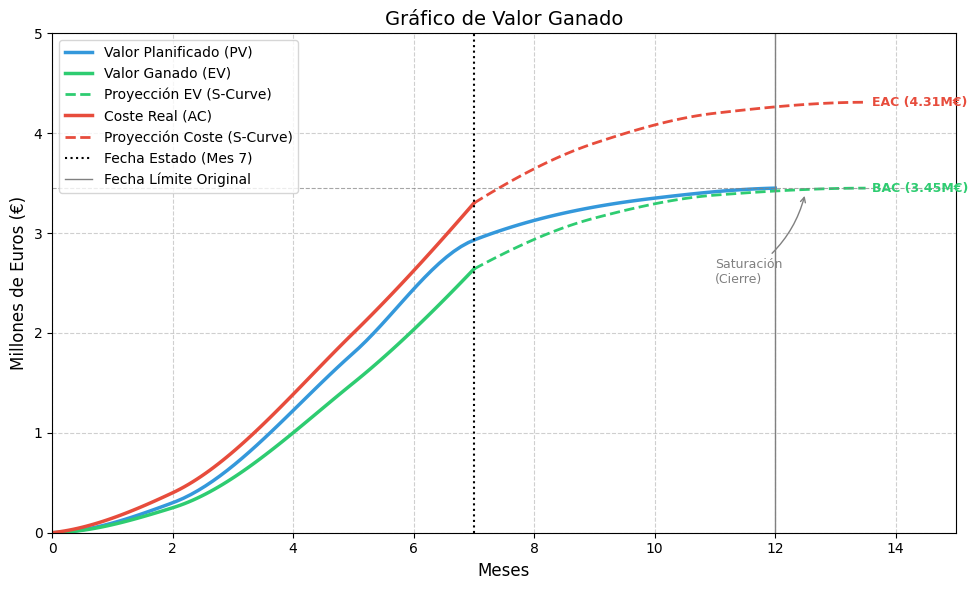

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Time axes
t_actual = np.array([0, 2, 5, 7]) # Past
t_proj = np.array([7, 9, 11, 13.5]) # Future (Forecast)

# --- PV  ---
t_pv = np.array([0, 2, 5, 7, 10, 12])
v_pv = np.array([0, 0.3, 1.8, 2.93, 3.35, 3.45])
spl_pv = PchipInterpolator(t_pv, v_pv)

# --- EV ---
v_ev_actual = np.array([0, 0.25, 1.5, 2.64])
v_ev_proj_points = np.array([2.64, 3.15, 3.38, 3.45])
spl_ev_actual = PchipInterpolator(t_actual, v_ev_actual)
spl_ev_proj = PchipInterpolator(t_proj, v_ev_proj_points)

# --- AC  ---
v_ac_actual = np.array([0, 0.4, 2.0, 3.30])
v_ac_proj_points = np.array([3.30, 3.90, 4.20, 4.31])
spl_ac_actual = PchipInterpolator(t_actual, v_ac_actual)
spl_ac_proj = PchipInterpolator(t_proj, v_ac_proj_points)

# Generate smooth plotting data
x_smooth_pv = np.linspace(0, 12, 100)
x_smooth_actual = np.linspace(0, 7, 100)
x_smooth_proj = np.linspace(7, 13.5, 100)

plt.figure(figsize=(10, 6))
plt.style.use('default')
plt.grid(True, linestyle='--', alpha=0.6)

# 1. PV Curve
plt.plot(x_smooth_pv, spl_pv(x_smooth_pv), label='Valor Planificado (PV)', color='#3498db', linewidth=2.5)

# 2. EV Curves
plt.plot(x_smooth_actual, spl_ev_actual(x_smooth_actual), label='Valor Ganado (EV)', color='#2ecc71', linewidth=2.5)
plt.plot(x_smooth_proj, spl_ev_proj(x_smooth_proj), linestyle='--', color='#2ecc71', linewidth=2, label='Proyección EV (S-Curve)')

# 3. AC Curves
plt.plot(x_smooth_actual, spl_ac_actual(x_smooth_actual), label='Coste Real (AC)', color='#e74c3c', linewidth=2.5)
plt.plot(x_smooth_proj, spl_ac_proj(x_smooth_proj), linestyle='--', color='#e74c3c', linewidth=2, label='Proyección Coste (S-Curve)')

# Vertical Lines & Targets
plt.axvline(x=7, color='black', linestyle=':', label='Fecha Estado (Mes 7)')
plt.axvline(x=12, color='gray', linestyle='-', linewidth=1, label='Fecha Límite Original')
plt.axhline(y=3.45, color='gray', linestyle='--', linewidth=0.8, alpha=0.7) # BAC Line

# Annotations
plt.text(13.6, 3.45, 'BAC (3.45M€)', va='center', fontsize=9, color='#2ecc71', fontweight='bold')
plt.text(13.6, 4.31, 'EAC (4.31M€)', va='center', fontsize=9, color='#e74c3c', fontweight='bold')

# Highlight the S-shape end
plt.annotate('Saturación\n(Cierre)', xy=(12.5, 3.40), xytext=(11, 2.5),
             arrowprops=dict(arrowstyle='->', color='gray', connectionstyle="arc3,rad=.2"),
             fontsize=9, color='gray')

plt.title('Gráfico de Valor Ganado', fontsize=14)
plt.xlabel('Meses', fontsize=12)
plt.ylabel('Millones de Euros (€)', fontsize=12)
plt.legend(loc='upper left')
plt.xlim(0, 15)
plt.ylim(0, 5.0)

plt.tight_layout()
plt.savefig('grafico_curva_s_completa.png')